In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6
import numpy as np
import pandas as pd
import requests
from config import api_key
import eia
import datetime
import re
from sqlalchemy import create_engine
from datetime import datetime

In [2]:
# test if api_key variable works
# (remove this line output when making public)
api_key

'021bf1d89256205c8528b6d4475485b3'

In [3]:
# save variable to call in api data w/ key
api = eia.API(api_key)

In [4]:
# save all relevant api endings as an iterable object
series = ['TOTAL.TEICBUS.M','TOTAL.TERCBUS.M','TOTAL.TEACBUS.M','TOTAL.TXCCBUS.M','TOTAL.TXEIBUS.M','TOTAL.TXICBUS.M','TOTAL.TXRCBUS.M','TOTAL.TXACBUS.M','TOTAL.TETCBUS.M']

In [5]:
# test one api ending; import to pandas dataframe
test_import = api.data_by_series(series='TOTAL.TECCBUS.M')
eia_df = pd.DataFrame(test_import)
eia_df.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
1973 01,1079.310
1973 02,1001.920
1973 03,884.437
1973 04,735.461
1973 05,696.114


In [6]:
# iterate through api endings and save to above dataframe
for x in series:
    series_search = api.data_by_series(series=x)
    df = pd.DataFrame(series_search)
    eia_df = eia_df.join(df, how="outer")


In [7]:
# print all data in df
eia_df.tail()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
2018 05,1435.837,2747.383,1378.514,2462.406,253.900,3128.758,1892.474,292.806,2456.202,8021.157
2018 06,1474.673,2679.517,1562.457,2431.309,228.150,3416.029,1843.755,235.152,2424.870,8149.256
2018 07,1556.004,2761.916,1782.894,2501.553,223.335,3762.883,1895.952,225.157,2495.040,8606.516
2018 08,1559.876,2871.840,1729.648,2545.495,227.456,3733.591,1991.439,215.682,2538.692,8707.549
2018 09,1422.358,2648.561,1488.834,2313.560,230.369,3253.682,1852.436,229.623,2307.205,7870.618


In [8]:
# create numeric index (unique identifier)
eia_df = eia_df.reset_index()
eia_df = eia_df.rename(columns={"index":"Time"})
eia_df.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551


In [9]:
# new dataframe with just datestamp and total usage. Adjust here to test of different datasets.
total_monthly_df = eia_df[["Time", "Total Primary Energy Consumption, Monthly (Trillion Btu)"]]


# time column still needs to be converted to datetime for time series analysis

In [10]:
# create object for existing timestamp column and an empty list for converted timestamp
timestamp = total_monthly_df["Time"]
datetime_list = []

In [11]:
# fill empty list with dates converted to datetime
for i in timestamp:
    i = i.replace(" ", "-")
    i = i + "01"
    i = pd.to_datetime(i, infer_datetime_format = True)
    datetime_list.append(i)

In [12]:
# convert to array so it can be added to pandas df
datetime_array = np.asarray(datetime_list)

In [13]:
# add datetime array to total consumption df
total_monthly_df['Date'] = datetime_array

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
raw_df = total_monthly_df[["Date", "Total Primary Energy Consumption, Monthly (Trillion Btu)"]]
raw_df = raw_df.set_index("Date")
raw_df.tail()


,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
2018-05-01,8021.157
2018-06-01,8149.256
2018-07-01,8606.516
2018-08-01,8707.549
2018-09-01,7870.618


## Start Time Series Testing Here

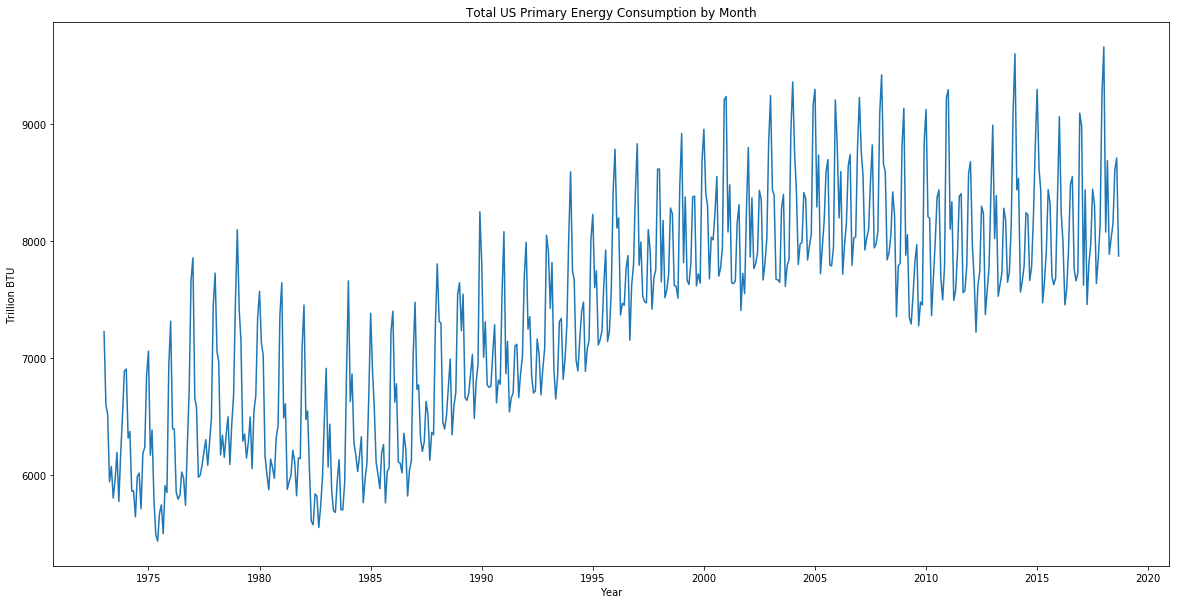

In [15]:
# raw data line plot
plt.figure(figsize=(20,10))
plt.title("Total US Primary Energy Consumption by Month")
plt.xlabel("Year")
plt.ylabel("Trillion BTU")
plt.plot(raw_df)

In [16]:
import plotly.plotly as ply
import cufflinks as cf
raw_df.iplot(title="Energy Consumption Jan 1973-May 2018")

## Decomposition
Here we can see there is an upward trend. We can use statsmodels to perform a decomposition of this time series. The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

## Decomposition charts below
You have to go to the webpage that it spits out. For me it automatically opens, but you may need my username and password. Not sure. 

In [17]:
import plotly
from plotly.plotly import plot_mpl
plotly.tools.set_credentials_file(username='cvavoulis', api_key='idvhBcrfyB7GaC6jqdr8')
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(raw_df, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

'https://plot.ly/~cvavoulis/30'

Below we perform a grid search for the optimal parameters. We want the lowes AIC score. AIC is an estimator of the relative quality of statistical models for a given set of data. The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

-- I'm pretty sure that it runs this and automatically chooses the best one. In this case the best one is the AIC score of 7068.90 so we use the order parameters of (1,1,1) and seasonal order parameters of (2,1,1,12) 

-- You can see these results below in the variable "results"

In [18]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(raw_df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7080.558, BIC=7101.978, Fit time=1.913 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7416.031, BIC=7424.599, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=7286.517, BIC=7303.653, Fit time=0.785 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7103.099, BIC=7120.235, Fit time=1.118 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=7078.750, BIC=7104.455, Fit time=2.447 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=7217.997, BIC=7239.418, Fit time=1.815 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7081.712, BIC=7111.701, Fit time=8.663 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=7299.505, BIC=7316.642, Fit time=0.472 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=7084.424, BIC=7118.697, Fit time=9.359 seconds
Fit ARIMA: order=(0, 1, 1) s

In [41]:
print(stepwise_model)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')


In [20]:
# Here we are training on the data from 1973 through the end of 2015. The rest is test data.
train = raw_df.loc['1973-01-01':'2015-12-01']
test = raw_df.loc['2016-01-01':]
len(test)

33

In [21]:
# fit the model
results=stepwise_model.fit(train)
results

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [22]:
future_forecast = stepwise_model.predict(n_periods=33)
# 33 is the length of the test data
# below prints the "forecast" for the test data
print(future_forecast)

[8875.82762591 8095.25951062 8154.06396549 7364.79646468 7530.98902003
 7725.24463739 8208.13807708 8183.30393398 7466.69775993 7529.32341593
 7690.60069743 8586.54450592 8957.53688686 8048.22782014 8135.8391466
 7345.10057118 7493.60968837 7664.97717884 8133.85248377 8127.27882884
 7415.71268887 7510.58825891 7730.97802152 8623.39595895 8985.89394597
 8084.4964847  8139.34276856 7323.17403582 7472.78932266 7651.94692434
 8126.5538556  8107.5554298  7408.93258895]


In [23]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
# we graph the actual data on top of the forecasted data that we created. It follows the same trend so we know that it was successful 
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()


In [25]:
# This shows the test data to the right compared to all of the data.
pd.concat([raw_df,future_forecast],axis=1).iplot()

## STOP - this is where I started to do things on my own and it did not go well, but look at the other notebook and this section worked

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[raw_df.index[-1]+DateOffset(months=x) for x in range (0,24)]

In [27]:
futures_datest_df=pd.DataFrame(index=future_dates[1:], columns=raw_df.columns)

In [28]:
futures_datest_df.tail()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
2020-04-01,NaN
2020-05-01,NaN
2020-06-01,NaN
2020-07-01,NaN
2020-08-01,NaN


In [29]:
future_df=pd.concat([raw_df, futures_datest_df])
future_df.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
1973-01-01,7226.265
1973-02-01,6594.709
1973-03-01,6524.198
1973-04-01,5944.336
1973-05-01,6074.551


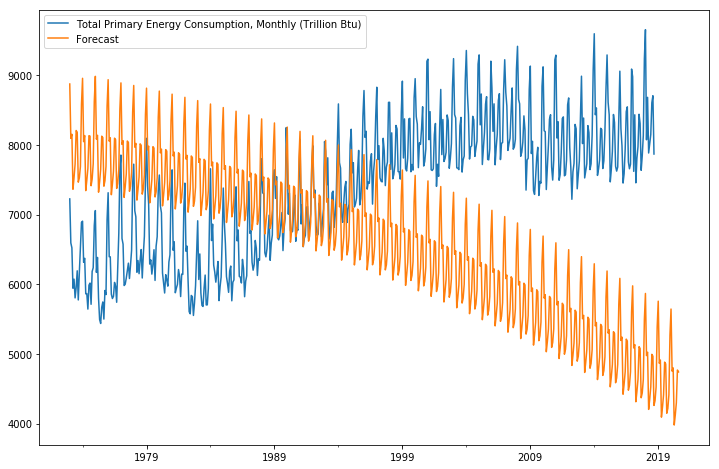

In [30]:
future_df["Forecast"]=results.predict(n_periods=572)
future_df[["Total Primary Energy Consumption, Monthly (Trillion Btu)", "Forecast"]].plot(figsize=(12,8))

In [31]:
future_df.tail()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)",Forecast
2020-04-01,NaN,3980.464850
2020-05-01,NaN,4125.643448
2020-06-01,NaN,4300.472484
2020-07-01,NaN,4769.760763
2020-08-01,NaN,4742.761586


##  Test stationarity
### If mean is not constant, data is not stationary. Scale the data in various ways to figure out the best way to achieve stationarity.
#### We test for stationarity in two ways: a visual test and a statistical test
- VISUAL TEST: plot rolling mean and stdev for a visual of whether data is stationary
    - if data is stationary, it the mean should be close to a straight line with no slope
- STATS TEST: run Dickey-Fuller test for statistical confirmation of whether data is stationary
    - if data is stationary, the P-value should be < 0.05 and the absolute value of the Test Statistic should be greater than the absolute value of the Critical Value

In [32]:
# create function to create rolling mean and stdev, plot for visual test, and DF for stat test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determine rolling stats
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plot rolling stats
    orig=plt.plot(timeseries, color="blue", label="Original")
    mean=plt.plot(movingAverage, color="red", label="Rolling Mean")
    std=plt.plot(movingStd, color="black", label="Rolling STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and STD")
    plt.show(block=False)
     
    #perform Dickey-Fuller test
    print("Results of Dickey Fuller test:")
    dftest = adfuller(timeseries["Total Primary Energy Consumption, Monthly (Trillion Btu)"], autolag = 'AIC')
    dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "P-Value",'# Lags Used',"# of Obsv Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)
    

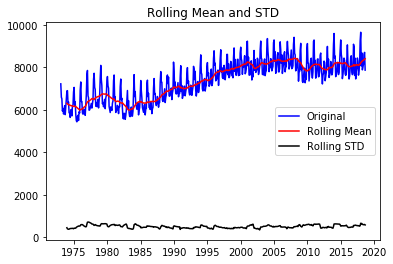

Results of Dickey Fuller test:
Test Statistic           -0.995665
P-Value                   0.754842
# Lags Used              14.000000
# of Obsv Used          534.000000
Critical Value (1%)      -3.442655
Critical Value (5%)      -2.866968
Critical Value (10%)     -2.569661
dtype: float64


In [33]:
# this is how we know the raw data is not stationary
test_stationarity(raw_df)

## Test with Seasonal Decomposition

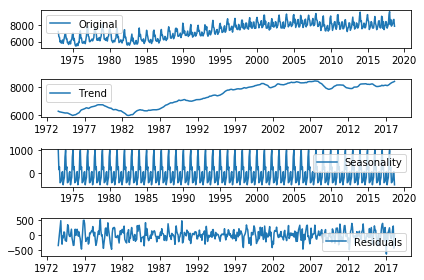

In [34]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(raw_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(raw_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

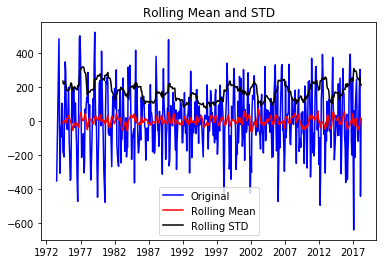

Results of Dickey Fuller test:
Test Statistic         -1.007408e+01
P-Value                 1.236987e-17
# Lags Used             1.400000e+01
# of Obsv Used          5.220000e+02
Critical Value (1%)    -3.442940e+00
Critical Value (5%)    -2.867093e+00
Critical Value (10%)   -2.569727e+00
dtype: float64


In [35]:
# test stationarity on residual plot after trend and seasonality has been removed 

raw_df_log_decompose = residual
raw_df_log_decompose.dropna(inplace=True)
test_stationarity(raw_df_log_decompose)

# DF shows this is by far the highest confidence model

## Begin Forecasting Here

### rephrase this explanation!!

Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

#### Selecting p, q, and d values

1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

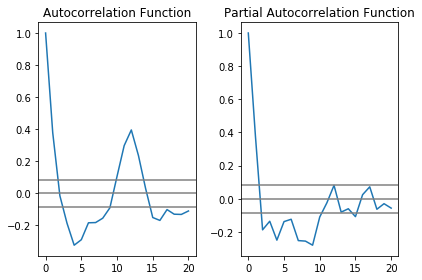

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(raw_df_log_decompose, nlags=20)
lag_pacf = pacf(raw_df_log_decompose, nlags=20, method = 'ols')
#ols is 'ordinary least squares' method

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.axhline(y=1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.axhline(y=1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [37]:
raw_df_log_decompose.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
1973-07-01,-352.934098
1973-08-01,-134.850467
1973-09-01,46.375881
1973-10-01,260.846720
1973-11-01,483.098330


/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Plotting AR model


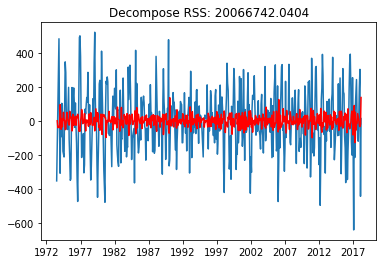

In [38]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(raw_df_log_decompose, order=(1, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
preRSS = (results_AR.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
preRSS.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(preRSS))
print('Plotting AR model')

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Plotting MA model


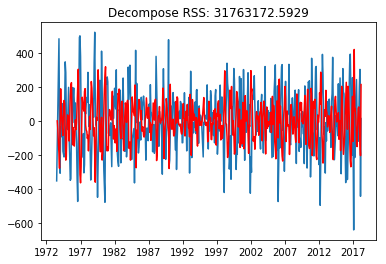

In [39]:
#MA MODEL
model = ARIMA(raw_df_log_decompose, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_MA.fittedvalues, color='red')
preRSS = (results_MA.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
preRSS.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(preRSS))
print('Plotting MA model')


/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Plotting ARIMA model


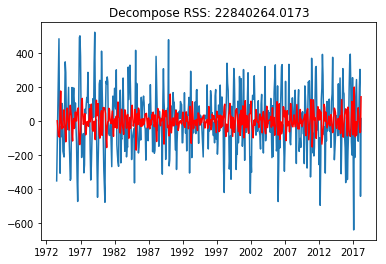

In [40]:
#ARIMA MODEL
model = ARIMA(raw_df_log_decompose, order=(2, 1, 0))
results_ARIMA = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
result = (results_ARIMA.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
result.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(result))
print('Plotting ARIMA model')
